In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
from sklearn import model_selection, datasets, linear_model, metrics, preprocessing

class TSSplit(model_selection.TimeSeriesSplit):
    def __init__(self, n_splits=5, max_train_size=None, test_size=None, splitter_col_name: str = None, gap=0):
        super().__init__(n_splits=n_splits, max_train_size=max_train_size, test_size=test_size, gap=gap)
        self.splitter_col_name = splitter_col_name

    def split(self, X, y=None, groups=None):
        splitter_col = X[self.splitter_col_name]
        splitter_col = splitter_col.drop_duplicates().sort_values().reset_index(drop=True).to_frame()
        for train_idx, test_idx in super().split(splitter_col):
            train_idx = X[X[self.splitter_col_name].isin(splitter_col.iloc[train_idx][self.splitter_col_name].tolist())].index.tolist()
            test_idx = X[X[self.splitter_col_name].isin(splitter_col.iloc[test_idx][self.splitter_col_name].tolist())].index.tolist()
            yield train_idx, test_idx

    def get_anchor_dates(self, X):
        splitter_col = X[self.splitter_col_name]
        splitter_col = splitter_col.drop_duplicates().sort_values().reset_index(drop=True).to_frame()
        anchor_dates = []
        for train_idx, test_idx in super().split(splitter_col):
            anchor_dates.append(splitter_col.iloc[test_idx[0]][self.splitter_col_name])
        return anchor_dates


In [5]:
# df = pd.read_csv('/content/drive/My Drive/output_data_1.csv')
df = pd.read_csv('input_last_version_3.csv')
#df = pd.read_csv('input_60000_100.csv')

In [6]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [7]:
df.shape

(470758, 7)

In [8]:
len(df[df['Label']=='m']['HostName'].unique())

4871

In [9]:
df['FromPrevAttemptUserName'] = df.groupby(['UserName','HostName'])['Date_Time'].diff().dt.total_seconds().fillna(5)
df['FromPrevAttemptUserName'] = df['FromPrevAttemptUserName'].apply(lambda x: 300 if x > 300 else x)

In [ ]:
# conditions_1 = [
#    (df['FromPrevAttemptUserName'] >= 300),
#    ((df['FromPrevAttemptUserName'] >= 60) & (df['FromPrevAttemptUserName'] < 300)),
#    ((df['FromPrevAttemptUserName'] >= 4) & (df['FromPrevAttemptUserName'] < 60)),
#    ((df['FromPrevAttemptUserName'] > 0) & (df['FromPrevAttemptUserName'] < 4)),
#     (df['FromPrevAttemptUserName'] == 0)
# ]

# values = [0,1,2,3,4]

# # Create a new column 'Label_HostName' based on the conditions
# df['FromPrevAttemptUserName'] = np.select(conditions_1, values, default=np.nan)
# #df['FromPrevAttemptUserName'] = df.groupby('UserName')['FromPrevAttemptUserName'].transform(lambda x: 0 if any(x == 4) else x==x)
# #df['FromPrevAttemptUserName'] = df.groupby(['UserName','HostName'])['FromPrevAttemptUserName'].transform(lambda x: 4 if any(x == 4) else x==x)


In [ ]:
# conditions_2 = [
#    (df['FromPrevAttemptHostName'] >= 300),
#    ((df['FromPrevAttemptHostName'] >= 60) & (df['FromPrevAttemptHostName'] < 300)),
#    ((df['FromPrevAttemptHostName'] >= 4) & (df['FromPrevAttemptHostName'] < 60)),
#    ((df['FromPrevAttemptHostName'] > 0) & (df['FromPrevAttemptHostName'] < 4)),
#    (df['FromPrevAttemptHostName'] == 0)
# ]

# values = [0, 1,2,3,4]

# # Create a new column 'Label_HostName' based on the conditions
# df['FromPrevAttemptHostName'] = np.select(conditions_2, values, default=np.nan)
# #df['FromPrevAttemptHostName'] = df.groupby('HostName')['FromPrevAttemptHostName'].transform(lambda x: 4 if any(x == 4) else x==x)

In [ ]:
# username_counts = df['UserName'].value_counts()
# df['Label_UserCount'] = 'YY'
# # Identify usernames with counts greater than 50
# usernames_gt_20 = username_counts[username_counts > 20].index

# # # Identify hostnames associated with usernames and update 'Label' to 'TT'
# mask = (df['UserName'].isin(usernames_gt_20))
# df.loc[mask, 'Label_UserCount'] = 'TT'
# df['UsernameCount'] = df.groupby('UserName')['UserName'].transform('count')

In [ ]:
# conditions = [(df['UserHostObservedSofar'] >=50),
#               (df['UserHostObservedSofar'] >=20) & (df['UserHostObservedSofar'] <50 ),
#               (df['UserHostObservedSofar'] >=10) & (df['UserHostObservedSofar'] <20 ),
#               (df['UserHostObservedSofar'] < 10)]
# values = [0, 1, 2, 3]  
# df['UserHostObservedSofar'] = np.select(conditions, values, default=np.nan)

In [ ]:
# conditions = [(df['HostObservedSofar'] >=50),
#               (df['HostObservedSofar'] >=20) & (df['HostObservedSofar'] <50 ),
#               (df['HostObservedSofar'] >=10) & (df['HostObservedSofar'] <20 ),
#               (df['HostObservedSofar'] < 10)]
# values = [0, 1, 2, 3]  
# df['HostObservedSofar'] = np.select(conditions, values, default=np.nan)

In [ ]:
# username_counts = df['UserName'].value_counts()
# df['Label_UserCount'] = 'YY'
# # Identify usernames with counts greater than 50
# usernames_gt_50 = username_counts[username_counts > 50].index

# # # Identify hostnames associated with usernames and update 'Label' to 'TT'
# mask = (df['UserName'].isin(usernames_gt_50))
# df.loc[mask, 'Label_UserCount'] = 'TT'
# #df['UsernameCount'] = df.groupby('UserName')['UserName'].transform('count')

# df['k'] = 1
# df['x'] = 1
# df['y'] = 1
# #df['UserNameObservedSofar'] = df.groupby('UserName')['k'].cumsum()
# df['UserHostObservedSofar'] = df.groupby(['HostName', 'UserName'])['x'].cumsum() #Max 11
# df = df.drop('x', axis=1)
# df['UserHostObservedSofar'] = df.groupby('HostName')['UserHostObservedSofar'].transform('max')


# df['HostName_count']= df.groupby('HostName')['k'].cumsum()
# df = df.drop('k', axis=1)

# df['UserName_count']= df.groupby('UserName')['y'].cumsum()
# df = df.drop('y', axis=1)


# df['Multi'] = (df['UserHostObservedSofar']*df['HostName_count'])/df['UserName_count']
# df['Divide'] = (df['UserHostObservedSofar']/df['HostName_count'])/(df['UserHostObservedSofar']*df['HostName_count'])
# #df['Multi'] = df.groupby('HostName')['Multi'].transform(lambda x: 'YY' if any(x > 125) else 'TT')

# df['Divide'] = ((df['UserHostObservedSofar']/(df['HostName_count']*df['HostName_count']))/((df['UserHostObservedSofar']*df['HostName_count']))*df['UserName_count'])

# #df['UsernameCount_max300'] = df['UsernameCount'].apply(lambda x: 300 if x > 300 else x)

In [10]:
df['FromPrevAttemptHostName'] = df.groupby('HostName')['Date_Time'].diff().dt.total_seconds().fillna(5)
df['FromPrevAttemptHostName'] = df['FromPrevAttemptHostName'].apply(lambda x: 300 if x > 300 else x)
df['FromPrevAttemptHostName'] = df.groupby('HostName')['FromPrevAttemptHostName'].transform(lambda x: 0 if any(x < 4) else x)

In [11]:
df = df[df['FromPrevAttemptHostName']>4]
len(df)

39231

In [12]:
df['x'] = 1
df['UserHostObservedSofar'] = df.groupby(['HostName', 'UserName'])['x'].cumsum() #Max 11
df = df.drop('x', axis=1)

In [13]:
df['z'] = 1
df['HostObservedSofar'] = df.groupby(('HostName'))['z'].cumsum() #Max 11
df = df.drop('z', axis=1)

In [14]:
df['HostBase'] = df['HostName'].str.split(".").str[:2].str.join(".")

In [15]:
df['y'] = df['Label'].eq("m").astype(int)
df = df.reset_index(drop=True)

In [16]:
from sklearn import tree, preprocessing, pipeline, model_selection, metrics, compose, ensemble, svm

## XGBOOST

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc, f1_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [18]:
c = compose.ColumnTransformer([
  #  ('ohe', preprocessing.OneHotEncoder(handle_unknown='ignore'), ['Label_UserName','Label_HostName']),
  #  ('ohe', preprocessing.OneHotEncoder(handle_unknown='ignore'), ['HostBase']),

      ('ohe', preprocessing.OneHotEncoder(handle_unknown='ignore'), ['HostBase']),
 #   ('ohe', preprocessing.OneHotEncoder(handle_unknown='ignore'), ['UserHostObservedSofar','Label_UserName','Label_HostName']),

    # ('ohe', preprocessing.OneHotEncoder(handle_unknown='ignore'), ['Divide','Label_UserName','Label_HostName','HostBase']),

  #  ("scale", preprocessing.StandardScaler(), ['Label_UserName'])

      ("scale", preprocessing.StandardScaler(), ['FromPrevAttemptUserName','FromPrevAttemptHostName','UserHostObservedSofar','HostObservedSofar'])
   #    ("scale", preprocessing.StandardScaler(), ['UserHostObservedSofar'])

])

In [19]:
#feature_weights = {'Multi': 10, 'Label_HostName': 5, 'Label_UserName':3, 'HostBase':3}  df['UserHostObservedSofar']/df['HostName_count'])

p = pipeline.Pipeline([
    ('1', c),
    ('2',  xgb.XGBClassifier(objective="binary:logistic", random_state=42))
])

In [20]:
splitter = TSSplit(n_splits=10, test_size=1, splitter_col_name='DateTime')

In [21]:
cv = model_selection.cross_validate(estimator=p,
                                    X=df,
                                    y=df['y'],
                                    #cv=model_selection.StratifiedKFold(n_splits=5, shuffle=True),
                                    cv=splitter,
                                    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                    return_estimator=True,
                                    n_jobs=-1
                                    )

In [22]:
cvf = pd.DataFrame(cv, index=splitter.get_anchor_dates(df))
cvf

,fit_time,score_time,estimator,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
2022-03-22,0.642439,0.031275,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.681818,0.300000,1.000000,0.461538,0.894737
2022-03-23,0.681771,0.038315,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.642857,0.166667,1.000000,0.285714,1.000000
2022-03-24,0.696433,0.039302,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.733333,0.600000,1.000000,0.750000,0.879630
2022-03-25,0.783777,0.051585,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.990979,0.994778,0.996078,0.995428,0.983244
2022-03-26,0.835501,0.074145,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.998788,0.999090,0.999697,0.999393,0.985372
2022-03-27,0.832537,0.072887,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.999482,0.999741,0.999741,0.999741,0.997245
2022-03-28,0.893255,0.106812,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.998570,0.999386,0.999182,0.999284,0.994910
2022-03-29,0.980623,0.078149,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.999330,0.999329,1.000000,0.999665,0.996389
2022-03-30,1.021738,0.023764,"(ColumnTransformer(transformers=[('ohe', OneHo...",1.000000,1.000000,1.000000,1.000000,1.000000
2022-03-31,0.904964,0.079230,"(ColumnTransformer(transformers=[('ohe', OneHo...",0.992212,0.992126,1.000000,0.996047,0.990278


In [23]:
a = []
for train, test in splitter.split(df):
  # print(train)
  X_train = df.iloc[train]
  y_train = df['y'].iloc[train]
  X_test = df.iloc[test]
  print(X_test['DateTime'].unique())
  y_test = df['y'].iloc[test]
  p.fit(X_train, y_train)
  pred = pd.DataFrame(index=df['y'].iloc[test].index)
  pred['DateTime'] = X_test['DateTime']
  pred['Prediction'] = p.predict(X_test)
  pred['Proba'] = p.predict_proba(X_test)[:, 1]
  pred['Truth'] = y_test
  a.append(pred)

<DatetimeArray>
['2022-03-22 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-23 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-24 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-25 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-26 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-27 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-28 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-29 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-30 00:00:00']
Length: 1, dtype: datetime64[ns]
<DatetimeArray>
['2022-03-31 00:00:00']
Length: 1, dtype: datetime64[ns]


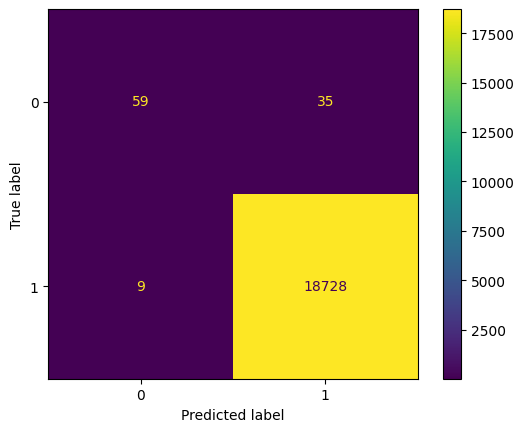

In [24]:
result = pd.concat(a, axis=0)
metrics.ConfusionMatrixDisplay.from_predictions(result['Truth'], result['Prediction'])

pr, pd, re = metrics.precision_recall_curve(pos_label=1, y_true=df['y'],
                                probas_pred=cvf['estimator'][0].predict_proba(df[['UserHostObservedSofar','HostObservedSofar','FromPrevAttemptHostName','FromPrevAttemptUserName','HostBase']])[:, 1])

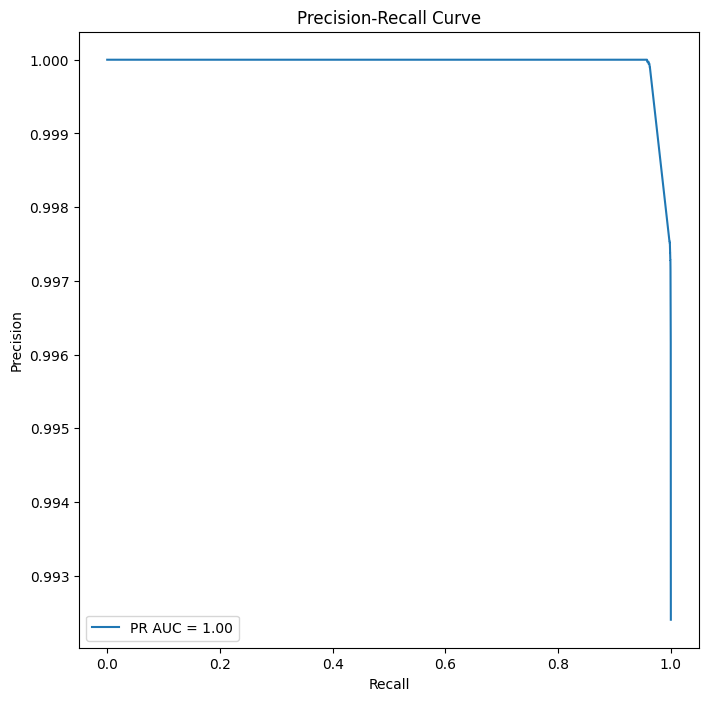

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Assuming you have calculated precision, recall, and predicted probabilities as mentioned
precision, recall, thresholds = metrics.precision_recall_curve(
    pos_label=1,
    y_true=df['y'],
    probas_pred=cvf['estimator'][0].predict_proba(df[['UserHostObservedSofar','HostObservedSofar','FromPrevAttemptHostName','FromPrevAttemptUserName','HostBase']])[:, 1]
)

# Calculate area under the curve (AUC)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [27]:
df.iloc[result[result['Truth'].ne(result['Prediction'])].index]

,Date_Time,PID,UserName,HostName,DateTime,HourTime,Label,FromPrevAttemptUserName,FromPrevAttemptHostName,UserHostObservedSofar,HostObservedSofar,HostBase,y
20400,2022-03-22 00:57:25,586978,thakan,58.90.245.18,2022-03-22,00:57:25,b,5.0,5.0,1,1,58.90,0
20402,2022-03-22 00:57:54,586988,thakan,58.90.245.18,2022-03-22,00:57:54,b,22.0,22.0,3,3,58.90,0
20404,2022-03-22 04:32:24,595063,ccemal,52.140.89.79,2022-03-22,04:32:24,b,5.0,5.0,1,1,52.140,0
20407,2022-03-22 06:11:18,599255,root,75.212.38.98,2022-03-22,06:11:18,b,5.0,5.0,1,1,75.212,0
20410,2022-03-22 07:48:42,602130,fyaprak,122.49.78.231,2022-03-22,07:48:42,b,5.0,5.0,1,1,122.49,0
20413,2022-03-22 13:37:51,609292,ytek,178.89.45.111,2022-03-22,13:37:51,b,5.0,5.0,1,1,178.89,0
20418,2022-03-22 18:59:26,616090,ycan,189.45.94.49,2022-03-22,18:59:26,b,5.0,5.0,1,1,189.45,0
20423,2022-03-23 05:30:57,629380,scyber,210.65.190.51,2022-03-23,05:30:57,b,5.0,5.0,1,1,210.65,0
20425,2022-03-23 12:04:26,6317127,wblack,200.70.83.95,2022-03-23,12:04:26,b,5.0,5.0,1,1,200.70,0
20429,2022-03-23 19:14:20,656177,lhatice,62.90.100.29,2022-03-23,19:14:20,b,5.0,5.0,1,1,62.90,0


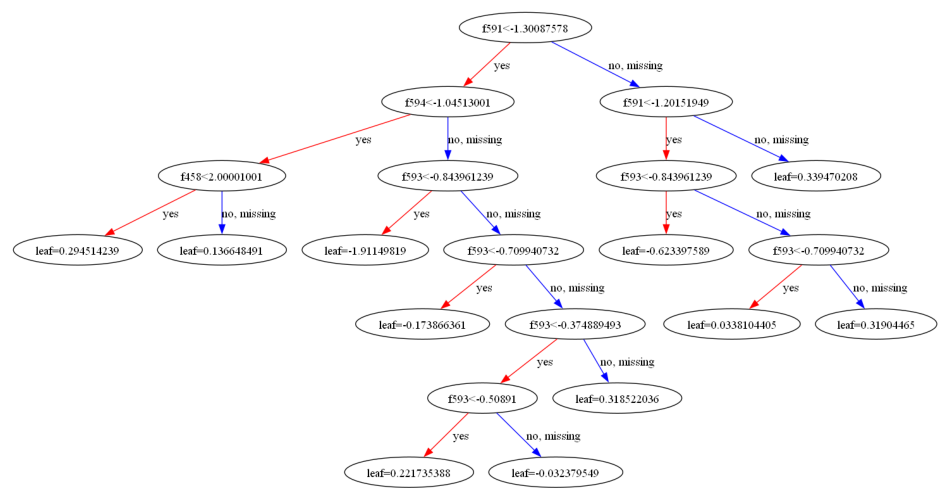

In [29]:
import matplotlib.pyplot as plt
import xgboost as xgb
import os

graphviz_path = r'C:\\Program Files\\Graphviz\\bin\\'
os.environ["PATH"] += os.pathsep + graphviz_path
# Assuming you have trained an XGBoost model (grid_search) on your data
chosen_model =cv['estimator'][0]
# Extract the first tree from the booster
first_tree = xgb.to_graphviz(chosen_model.named_steps['2'], num_trees=0)

# Plot the first tree
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread(first_tree.render(format='png')))
plt.axis('off')
plt.show()